# Reading in a short story as text sample into Python

## Step 1: Creating Tokens

In [2]:
from signal import pthread_sigmask

import tiktoken
from numpy.f2py.crackfortran import dimensionpattern

with open("the-verdict.txt", encoding="utf-8") as verdict:
    raw_text = verdict.read()

print(f"Total number of characters: {len(raw_text)}")
print()
print("THE VERDICT")
print("======================================================================================")
print(raw_text)

Total number of characters: 20479

THE VERDICT
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not loo

In [3]:
import re

sample_text = "Hello, world. This, is a test."
result = re.findall(r"\w+|[^\w\s]", sample_text)
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [4]:
result = re.findall(r"\w+|\s+|[^\w\s]", raw_text)
print(result)

['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '-', '-', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '-', '-', 'so', ' ', 'it', ' ', 'was', ' ', 'no', ' ', 'great', ' ', 'surprise', ' ', 'to', ' ', 'me', ' ', 'to', ' ', 'hear', ' ', 'that', ',', ' ', 'in', ' ', 'the', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', ',', ' ', 'he', ' ', 'had', ' ', 'dropped', ' ', 'his', ' ', 'painting', ',', ' ', 'married', ' ', 'a', ' ', 'rich', ' ', 'widow', ',', ' ', 'and', ' ', 'established', ' ', 'himself', ' ', 'in', ' ', 'a', ' ', 'villa', ' ', 'on', ' ', 'the', ' ', 'Riviera', '.', ' ', '(', 'Though', ' ', 'I', ' ', 'rather', ' ', 'thought', ' ', 'it', ' ', 'would', ' ', 'have', ' ', 'been', ' ', 'Rome', ' ', 'or', ' ', 'Florence', '.', ')', '\n\n', '"', 'The', ' ', 'height', ' ', 'of', ' ', 'his', ' ', 'glory', '"', '-', '-', 'that', ' ', 'was', ' ', 'what', ' ', 'the', ' ', 'women', ' '

In [5]:
print(len(result))

8460


In [6]:
from typing import List

def custom_tokenizer(text: str, include_whitespace: bool = True) -> List[str]:
    """
    Custom tokenizer that adds whitespace if include_whitespace is True.

    Parameters:
        text (str): The text to be tokenized.
        include_whitespace (bool, optional): Whether to include whitespace in the tokenization. Defaults to True.

    Returns:
        tokens (List[str]): A list of tokens.
    """
    if not include_whitespace:
        return re.findall(r"\w+|[^\w\s]", text)
    return re.findall(r"\w+|\s+|[^\w\s]", text)

## Step 2: Creating Token IDs

In [7]:
result = custom_tokenizer(raw_text, include_whitespace=False)

In [8]:
print(len(result))

4827


In [9]:
vocabulary = sorted(set(result))
print(vocabulary)

['!', '"', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed', 'Devonshire', 'Don', 'Dubarry_', 'Emperors', 'Florence', 'For', 'Gallery', 'Gideon', 'Gisburn', 'Gisburns', 'Grafton', 'Greek', 'Grindle', 'Grindles', 'HAD', 'Had', 'Hang', 'Has', 'He', 'Her', 'Hermia', 'His', 'How', 'I', 'If', 'In', 'It', 'Jack', 'Jove', 'Just', 'Lord', 'Made', 'Miss', 'Money', 'Monte', 'Moon', 'Mr', 'Mrs', 'My', 'Never', 'No', 'Now', 'Nutley', 'Of', 'Oh', 'On', 'Once', 'Only', 'Or', 'Perhaps', 'Poor', 'Professional', 'Renaissance', 'Rickham', 'Riviera', 'Rome', 'Russian', 'Sevres', 'She', 'Stroud', 'Strouds', 'Suddenly', 'That', 'The', 'Then', 'There', 'They', 'This', 'Those', 'Though', 'Thwing', 'Thwings', 'To', 'Usually', 'Venetian', 'Victor', 'Was', 'We', 'Well', 'What', 'When', 'Why', 'Yes', 'You', '_I', '_am_', '_famille', '_felt_', '_has_', '_have_', '_

In [10]:
print(f"Vocabulary Size: {len(vocabulary)}")

Vocabulary Size: 1148


In [11]:
vocabulary_dictionary = dict(zip(vocabulary, range(len(vocabulary))))
print(vocabulary_dictionary)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry_': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Rickham': 

In [12]:
class SimpleTokenizer:
    """
    A simple tokenizer class that create token IDs.
    """
    def __init__(self, vocab: List[str]):
        self.str_to_int = dict(zip(vocab, range(len(vocab))))
        self.int_to_str = dict(zip(range(len(vocab)), vocab))

    @staticmethod
    def custom_tokenizer(text: str, include_whitespace: bool = True) -> List[str]:
        """
        Custom tokenizer that adds whitespace if include_whitespace is True.

        Parameters:
            text (str): The text to be tokenized.
            include_whitespace (bool, optional): Whether to include whitespace in the tokenization. Defaults to True.

        Returns:
            tokens (List[str]): A list of tokens.
        """
        if not include_whitespace:
            return re.findall(r"\w+|[^\w\s]", text)
        return re.findall(r"\w+|\s+|[^\w\s]", text)

    def encode(self, text: str) -> List[int]:
        """
        Encodes a text into a list of integers.
        Parameters:
            text (str): The text to be encoded.
        Returns:
            tokens (List[int]): A list of integers.
        """
        tokens = self.custom_tokenizer(text, include_whitespace=False)
        token_ids = [self.str_to_int[token] for token in tokens]
        return token_ids

    def decode(self, token_ids: List[int]) -> str:
        """
        Decodes a list of integers into text.
        Parameters:
            token_ids (List[int]): A list of integers.
        Returns:
            text (str): The decoded text.
        """
        tokens = [self.int_to_str[ID] for ID in token_ids]
        text = " ".join(tokens)
        # Replace spaces before the specified punctuations
        text = re.sub(r"\s+([,.?\"()'])", r"\1", text)
        return text

In [13]:
tokenizer = SimpleTokenizer(vocabulary)

In [14]:
text = "It's the last he painted, you know, Mrs. Gisburn said with pardonable pride"

ids = tokenizer.encode(text)
print(ids)

[56, 2, 867, 1006, 615, 546, 760, 5, 1144, 609, 5, 67, 7, 38, 868, 1126, 769, 810]


In [15]:
tokenizer.decode(ids)

"It' s the last he painted, you know, Mrs. Gisburn said with pardonable pride"

In [16]:
text = """
I am currently working as an Assistant AI Engineer at Global InfoVentures Pvt. Ltd., where I am developing and integrating AI-driven solutions such as Conversational AI for the College ERP and Multi-Person Face Recognition Attendance Systems into the G5 Portal. With a Bachelor of Technology in Computer Science and Engineering from ABES Institute of Technology, Ghaziabad, I bring 2 years of experience in the dynamic field of artificial intelligence.

My passion lies in leveraging AI technologies to solve real-world problems, particularly in the areas of Conversational AI, Computer Vision, and Machine Learning. I am committed to continuous learning and staying at the forefront of emerging technologies. My current focus is on deepening my expertise in AI and exploring its intersection with other cutting-edge domains like Web 3.0 and blockchain.

I believe in the power of collaboration and am always eager to connect with fellow AI enthusiasts, seasoned professionals, and innovators who share my passion for technology. Together, we can explore new opportunities, share knowledge, and drive meaningful change in the tech industry.

If you're passionate about AI and are looking to collaborate, innovate, or simply share ideas, I would love to connect. Let's work together to shape the future and create impactful solutions.
"""

In [17]:
# tokenizer.encode(text)

## ADDING SPECIAL CONTEXT TOKENS

In [18]:
vocabulary.extend(["<|unknown|>", "<|endoftext|>"])
print(vocabulary)

['!', '"', "'", '(', ')', ',', '-', '.', ':', ';', '?', 'A', 'Ah', 'Among', 'And', 'Are', 'Arrt', 'As', 'At', 'Be', 'Begin', 'Burlington', 'But', 'By', 'Carlo', 'Chicago', 'Claude', 'Come', 'Croft', 'Destroyed', 'Devonshire', 'Don', 'Dubarry_', 'Emperors', 'Florence', 'For', 'Gallery', 'Gideon', 'Gisburn', 'Gisburns', 'Grafton', 'Greek', 'Grindle', 'Grindles', 'HAD', 'Had', 'Hang', 'Has', 'He', 'Her', 'Hermia', 'His', 'How', 'I', 'If', 'In', 'It', 'Jack', 'Jove', 'Just', 'Lord', 'Made', 'Miss', 'Money', 'Monte', 'Moon', 'Mr', 'Mrs', 'My', 'Never', 'No', 'Now', 'Nutley', 'Of', 'Oh', 'On', 'Once', 'Only', 'Or', 'Perhaps', 'Poor', 'Professional', 'Renaissance', 'Rickham', 'Riviera', 'Rome', 'Russian', 'Sevres', 'She', 'Stroud', 'Strouds', 'Suddenly', 'That', 'The', 'Then', 'There', 'They', 'This', 'Those', 'Though', 'Thwing', 'Thwings', 'To', 'Usually', 'Venetian', 'Victor', 'Was', 'We', 'Well', 'What', 'When', 'Why', 'Yes', 'You', '_I', '_am_', '_famille', '_felt_', '_has_', '_have_', '_

In [19]:
class SimpleTokenizerV2:
    """
    A simple tokenizer class that create token IDs.
    """
    def __init__(self, vocab: List[str]):
        self.str_to_int = dict(zip(vocab, range(len(vocab))))
        self.int_to_str = dict(zip(range(len(vocab)), vocab))

    @staticmethod
    def custom_tokenizer(text: str, include_whitespace: bool = True) -> List[str]:
        """
        Custom tokenizer that adds whitespace if include_whitespace is True.

        Parameters:
            text (str): The text to be tokenized.
            include_whitespace (bool, optional): Whether to include whitespace in the tokenization. Defaults to True.

        Returns:
            tokens (List[str]): A list of tokens.
        """
        if not include_whitespace:
            return re.findall(r"\w+|[^\w\s]", text)
        return re.findall(r"\w+|\s+|[^\w\s]", text)

    def encode(self, text: str) -> List[int]:
        """
        Encodes a text into a list of integers.
        Parameters:
            text (str): The text to be encoded.
        Returns:
            tokens (List[int]): A list of integers.
        """
        tokens = self.custom_tokenizer(text, include_whitespace=False)
        tokens = [
            item if item in self.str_to_int
            else "<|unknown|>" for item in tokens
        ]
        token_ids = [self.str_to_int[token] for token in tokens]
        return token_ids

    def decode(self, token_ids: List[int]) -> str:
        """
        Decodes a list of integers into text.
        Parameters:
            token_ids (List[int]): A list of integers.
        Returns:
            text (str): The decoded text.
        """
        tokens = [self.int_to_str[ID] for ID in token_ids]
        text = " ".join(tokens)
        # Replace spaces before the specified punctuations
        text = re.sub(r"\s+([,.?\"()'])", r"\1", text)
        return text

In [20]:
tokenizer = SimpleTokenizerV2(vocabulary)

In [21]:
print(tokenizer.str_to_int)

{'!': 0, '"': 1, "'": 2, '(': 3, ')': 4, ',': 5, '-': 6, '.': 7, ':': 8, ';': 9, '?': 10, 'A': 11, 'Ah': 12, 'Among': 13, 'And': 14, 'Are': 15, 'Arrt': 16, 'As': 17, 'At': 18, 'Be': 19, 'Begin': 20, 'Burlington': 21, 'But': 22, 'By': 23, 'Carlo': 24, 'Chicago': 25, 'Claude': 26, 'Come': 27, 'Croft': 28, 'Destroyed': 29, 'Devonshire': 30, 'Don': 31, 'Dubarry_': 32, 'Emperors': 33, 'Florence': 34, 'For': 35, 'Gallery': 36, 'Gideon': 37, 'Gisburn': 38, 'Gisburns': 39, 'Grafton': 40, 'Greek': 41, 'Grindle': 42, 'Grindles': 43, 'HAD': 44, 'Had': 45, 'Hang': 46, 'Has': 47, 'He': 48, 'Her': 49, 'Hermia': 50, 'His': 51, 'How': 52, 'I': 53, 'If': 54, 'In': 55, 'It': 56, 'Jack': 57, 'Jove': 58, 'Just': 59, 'Lord': 60, 'Made': 61, 'Miss': 62, 'Money': 63, 'Monte': 64, 'Moon': 65, 'Mr': 66, 'Mrs': 67, 'My': 68, 'Never': 69, 'No': 70, 'Now': 71, 'Nutley': 72, 'Of': 73, 'Oh': 74, 'On': 75, 'Once': 76, 'Only': 77, 'Or': 78, 'Perhaps': 79, 'Poor': 80, 'Professional': 81, 'Renaissance': 82, 'Rickham': 

In [22]:
print(tokenizer.int_to_str)

{0: '!', 1: '"', 2: "'", 3: '(', 4: ')', 5: ',', 6: '-', 7: '.', 8: ':', 9: ';', 10: '?', 11: 'A', 12: 'Ah', 13: 'Among', 14: 'And', 15: 'Are', 16: 'Arrt', 17: 'As', 18: 'At', 19: 'Be', 20: 'Begin', 21: 'Burlington', 22: 'But', 23: 'By', 24: 'Carlo', 25: 'Chicago', 26: 'Claude', 27: 'Come', 28: 'Croft', 29: 'Destroyed', 30: 'Devonshire', 31: 'Don', 32: 'Dubarry_', 33: 'Emperors', 34: 'Florence', 35: 'For', 36: 'Gallery', 37: 'Gideon', 38: 'Gisburn', 39: 'Gisburns', 40: 'Grafton', 41: 'Greek', 42: 'Grindle', 43: 'Grindles', 44: 'HAD', 45: 'Had', 46: 'Hang', 47: 'Has', 48: 'He', 49: 'Her', 50: 'Hermia', 51: 'His', 52: 'How', 53: 'I', 54: 'If', 55: 'In', 56: 'It', 57: 'Jack', 58: 'Jove', 59: 'Just', 60: 'Lord', 61: 'Made', 62: 'Miss', 63: 'Money', 64: 'Monte', 65: 'Moon', 66: 'Mr', 67: 'Mrs', 68: 'My', 69: 'Never', 70: 'No', 71: 'Now', 72: 'Nutley', 73: 'Of', 74: 'Oh', 75: 'On', 76: 'Once', 77: 'Only', 78: 'Or', 79: 'Perhaps', 80: 'Poor', 81: 'Professional', 82: 'Renaissance', 83: 'Rickha

In [23]:
text1 = "It's the last he painted, you know, Mrs. Gisburn said with pardonable pride."

ids = tokenizer.encode(text1)
print(ids)

[56, 2, 867, 1006, 615, 546, 760, 5, 1144, 609, 5, 67, 7, 38, 868, 1126, 769, 810, 7]


In [24]:
tokenizer.decode(ids)

"It' s the last he painted, you know, Mrs. Gisburn said with pardonable pride."

In [25]:
text2 = """
I am currently working as an Assistant AI Engineer at Global InfoVentures Pvt. Ltd., where I am developing and integrating AI-driven solutions such as Conversational AI for the College ERP and Multi-Person Face Recognition Attendance Systems into the G5 Portal. With a Bachelor of Technology in Computer Science and Engineering from ABES Institute of Technology, Ghaziabad, I bring 2 years of experience in the dynamic field of artificial intelligence.

My passion lies in leveraging AI technologies to solve real-world problems, particularly in the areas of Conversational AI, Computer Vision, and Machine Learning. I am committed to continuous learning and staying at the forefront of emerging technologies. My current focus is on deepening my expertise in AI and exploring its intersection with other cutting-edge domains like Web 3.0 and blockchain.

I believe in the power of collaboration and am always eager to connect with fellow AI enthusiasts, seasoned professionals, and innovators who share my passion for technology. Together, we can explore new opportunities, share knowledge, and drive meaningful change in the tech industry.

If you're passionate about AI and are looking to collaborate, innovate, or simply share ideas, I would love to connect. Let's work together to shape the future and create impactful solutions.
"""

In [26]:
ids = tokenizer.encode(text2)
print(ids)

[53, 1148, 1148, 1136, 188, 169, 1148, 1148, 1148, 191, 1148, 1148, 1148, 7, 1148, 7, 5, 1111, 53, 1148, 1148, 170, 1148, 1148, 6, 1148, 1148, 967, 188, 1148, 1148, 473, 1006, 1148, 1148, 170, 1148, 6, 1148, 1148, 1148, 1148, 1148, 593, 1006, 1148, 1148, 7, 1148, 129, 1148, 736, 1148, 582, 1148, 1148, 170, 1148, 495, 1148, 1148, 736, 1148, 5, 1148, 5, 53, 1148, 1148, 1141, 736, 1148, 582, 1006, 1148, 1148, 736, 1148, 1148, 7, 68, 1148, 634, 582, 1148, 1148, 1148, 1034, 1148, 837, 6, 1148, 1148, 5, 1148, 582, 1006, 1148, 736, 1148, 1148, 5, 1148, 1148, 5, 170, 1148, 1148, 7, 53, 1148, 1148, 1034, 1148, 1148, 170, 1148, 191, 1006, 1148, 736, 1148, 1148, 7, 68, 326, 1148, 598, 741, 1148, 711, 1148, 582, 1148, 170, 1148, 600, 1148, 1126, 749, 1148, 6, 1148, 1148, 640, 1148, 1148, 7, 1148, 170, 1148, 7, 53, 1148, 582, 1006, 1148, 736, 1148, 170, 1148, 163, 1148, 1034, 1148, 1126, 452, 1148, 1148, 5, 1148, 1148, 5, 170, 1148, 1115, 1148, 711, 1148, 473, 1148, 7, 1148, 5, 1148, 257, 1148, 114

In [27]:
tokenizer.decode(ids)

"I <|unknown|> <|unknown|> working as an <|unknown|> <|unknown|> <|unknown|> at <|unknown|> <|unknown|> <|unknown|>. <|unknown|>., where I <|unknown|> <|unknown|> and <|unknown|> <|unknown|> - <|unknown|> <|unknown|> such as <|unknown|> <|unknown|> for the <|unknown|> <|unknown|> and <|unknown|> - <|unknown|> <|unknown|> <|unknown|> <|unknown|> <|unknown|> into the <|unknown|> <|unknown|>. <|unknown|> a <|unknown|> of <|unknown|> in <|unknown|> <|unknown|> and <|unknown|> from <|unknown|> <|unknown|> of <|unknown|>, <|unknown|>, I <|unknown|> <|unknown|> years of <|unknown|> in the <|unknown|> <|unknown|> of <|unknown|> <|unknown|>. My <|unknown|> lies in <|unknown|> <|unknown|> <|unknown|> to <|unknown|> real - <|unknown|> <|unknown|>, <|unknown|> in the <|unknown|> of <|unknown|> <|unknown|>, <|unknown|> <|unknown|>, and <|unknown|> <|unknown|>. I <|unknown|> <|unknown|> to <|unknown|> <|unknown|> and <|unknown|> at the <|unknown|> of <|unknown|> <|unknown|>. My current <|unknown|> i

In [28]:
text = " <|endoftext|> ".join((text1, text2))

print(text)

It's the last he painted, you know, Mrs. Gisburn said with pardonable pride. <|endoftext|> 
I am currently working as an Assistant AI Engineer at Global InfoVentures Pvt. Ltd., where I am developing and integrating AI-driven solutions such as Conversational AI for the College ERP and Multi-Person Face Recognition Attendance Systems into the G5 Portal. With a Bachelor of Technology in Computer Science and Engineering from ABES Institute of Technology, Ghaziabad, I bring 2 years of experience in the dynamic field of artificial intelligence.

My passion lies in leveraging AI technologies to solve real-world problems, particularly in the areas of Conversational AI, Computer Vision, and Machine Learning. I am committed to continuous learning and staying at the forefront of emerging technologies. My current focus is on deepening my expertise in AI and exploring its intersection with other cutting-edge domains like Web 3.0 and blockchain.

I believe in the power of collaboration and am always

In [29]:
print(tokenizer.encode(text))

[56, 2, 867, 1006, 615, 546, 760, 5, 1144, 609, 5, 67, 7, 38, 868, 1126, 769, 810, 7, 1148, 1148, 1148, 1148, 1148, 53, 1148, 1148, 1136, 188, 169, 1148, 1148, 1148, 191, 1148, 1148, 1148, 7, 1148, 7, 5, 1111, 53, 1148, 1148, 170, 1148, 1148, 6, 1148, 1148, 967, 188, 1148, 1148, 473, 1006, 1148, 1148, 170, 1148, 6, 1148, 1148, 1148, 1148, 1148, 593, 1006, 1148, 1148, 7, 1148, 129, 1148, 736, 1148, 582, 1148, 1148, 170, 1148, 495, 1148, 1148, 736, 1148, 5, 1148, 5, 53, 1148, 1148, 1141, 736, 1148, 582, 1006, 1148, 1148, 736, 1148, 1148, 7, 68, 1148, 634, 582, 1148, 1148, 1148, 1034, 1148, 837, 6, 1148, 1148, 5, 1148, 582, 1006, 1148, 736, 1148, 1148, 5, 1148, 1148, 5, 170, 1148, 1148, 7, 53, 1148, 1148, 1034, 1148, 1148, 170, 1148, 191, 1006, 1148, 736, 1148, 1148, 7, 68, 326, 1148, 598, 741, 1148, 711, 1148, 582, 1148, 170, 1148, 600, 1148, 1126, 749, 1148, 6, 1148, 1148, 640, 1148, 1148, 7, 1148, 170, 1148, 7, 53, 1148, 582, 1006, 1148, 736, 1148, 170, 1148, 163, 1148, 1034, 1148, 112

In [30]:
print(tokenizer.decode(tokenizer.encode(text)))

It' s the last he painted, you know, Mrs. Gisburn said with pardonable pride. <|unknown|> <|unknown|> <|unknown|> <|unknown|> <|unknown|> I <|unknown|> <|unknown|> working as an <|unknown|> <|unknown|> <|unknown|> at <|unknown|> <|unknown|> <|unknown|>. <|unknown|>., where I <|unknown|> <|unknown|> and <|unknown|> <|unknown|> - <|unknown|> <|unknown|> such as <|unknown|> <|unknown|> for the <|unknown|> <|unknown|> and <|unknown|> - <|unknown|> <|unknown|> <|unknown|> <|unknown|> <|unknown|> into the <|unknown|> <|unknown|>. <|unknown|> a <|unknown|> of <|unknown|> in <|unknown|> <|unknown|> and <|unknown|> from <|unknown|> <|unknown|> of <|unknown|>, <|unknown|>, I <|unknown|> <|unknown|> years of <|unknown|> in the <|unknown|> <|unknown|> of <|unknown|> <|unknown|>. My <|unknown|> lies in <|unknown|> <|unknown|> <|unknown|> to <|unknown|> real - <|unknown|> <|unknown|>, <|unknown|> in the <|unknown|> of <|unknown|> <|unknown|>, <|unknown|> <|unknown|>, and <|unknown|> <|unknown|>. I <

## BYTE PAIR ENCODING

In [31]:
!python3 -m pip install tiktoken

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [32]:
import importlib
import tiktoken
importlib.reload(tiktoken)

<module 'tiktoken' from '/home/hamza/SelfLearningProjects/Building-LLM-From-Scratch/.venv/lib/python3.10/site-packages/tiktoken/__init__.py'>

In [33]:
tokenizer = tiktoken.get_encoding("gpt2")

In [34]:
text = "Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace."

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})
print(integers)

[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 286, 617, 34680, 27271, 13]


In [35]:
strings = tokenizer.decode(integers)

In [36]:
print(strings)

Hello, do you like tea? <|endoftext|> In the sunlit terraces of someunknownPlace.


In [37]:
integers = tokenizer.encode("Akwirw ier")
print(integers)

strings = tokenizer.decode(integers)
print(strings)

[33901, 86, 343, 86, 220, 959]
Akwirw ier


## CREATE INPUT-TARGET PAIRS

In [38]:
with open("the-verdict.txt", encoding="utf-8") as verdict:
    raw_text = verdict.read()

print(f"Total number of characters: {len(raw_text)}")
print()
print("THE VERDICT")
print("======================================================================================")
print(raw_text)

Total number of characters: 20479

THE VERDICT
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not loo

In [39]:
enc_text = tokenizer.encode(raw_text)
print(enc_text)
print(len(enc_text))

[40, 367, 2885, 1464, 1807, 3619, 402, 271, 10899, 2138, 257, 7026, 15632, 438, 2016, 257, 922, 5891, 1576, 438, 568, 340, 373, 645, 1049, 5975, 284, 502, 284, 3285, 326, 11, 287, 262, 6001, 286, 465, 13476, 11, 339, 550, 5710, 465, 12036, 11, 6405, 257, 5527, 27075, 11, 290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 

In [40]:
enc_sample = enc_text[50:]

In [41]:
context_size = 8

x = enc_sample[:context_size]
y = enc_sample[1:context_size+ 1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287, 257, 4489, 64, 319]
y:      [4920, 2241, 287, 257, 4489, 64, 319, 262]


In [42]:
for i in range(1, context_size + 1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(f"{context} -> {desired}")

[290] -> 4920
[290, 4920] -> 2241
[290, 4920, 2241] -> 287
[290, 4920, 2241, 287] -> 257
[290, 4920, 2241, 287, 257] -> 4489
[290, 4920, 2241, 287, 257, 4489] -> 64
[290, 4920, 2241, 287, 257, 4489, 64] -> 319
[290, 4920, 2241, 287, 257, 4489, 64, 319] -> 262


In [43]:
for i in range(1, context_size + 1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(f"{tokenizer.decode(context)} -> {tokenizer.decode([desired])}")

 and ->  established
 and established ->  himself
 and established himself ->  in
 and established himself in ->  a
 and established himself in a ->  vill
 and established himself in a vill -> a
 and established himself in a villa ->  on
 and established himself in a villa on ->  the


## IMPLEMENTING DATALOADER

In [44]:
import torch
from torch.utils.data import Dataset, DataLoader


class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []

        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i+max_length]
            target_chunk = token_ids[i+1:i+max_length+1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [45]:
def create_dataloader_v1(txt, batch_size=4, max_length=256, stride=128, shuffle=False, drop_last=True, num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")
    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [46]:
with open("the-verdict.txt", encoding="utf-8") as verdict:
    raw_text = verdict.read()

In [47]:
dataloader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=4)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


In [48]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[1807, 3619,  402,  271]]), tensor([[ 3619,   402,   271, 10899]])]


In [49]:
dataloader = create_dataloader_v1(raw_text, batch_size=8, max_length=4, stride=4)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


# WORD2VEC EMBEDDINGS

In [50]:
import gensim.downloader as api
model = api.load("word2vec-google-news-300")

In [51]:
word_vectors = model

print(word_vectors["computer"])

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [52]:
print(word_vectors["computer"].shape)

(300,)


## King + Woman - Man = ?

In [53]:
print(word_vectors.most_similar(positive=["king", "woman"], negative=["man"], topn=10))

[('queen', 0.7118191123008728), ('monarch', 0.6189674735069275), ('princess', 0.5902430415153503), ('crown_prince', 0.5499458909034729), ('prince', 0.5377322435379028), ('kings', 0.5236843824386597), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134939193726), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]


In [54]:
print(word_vectors.similarity("man", "woman"))
print(word_vectors.similarity("uncle", "aunt"))
print(word_vectors.similarity("king", "queen"))
print(word_vectors.similarity("paper", "water"))
print(word_vectors.similarity("love", "lust"))
print(word_vectors.similarity("king", "prince"))

0.7664013
0.76434743
0.6510956
0.11408083
0.49054837
0.61599934


In [55]:
vocab_size = 50257
output_dim = 256

embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [56]:
print(embedding_layer)

Embedding(50257, 256)


In [57]:
print(embedding_layer.weight)

Parameter containing:
tensor([[-0.5706,  0.6027, -0.2567,  ...,  0.0290, -0.1445, -2.0340],
        [-0.1791,  0.1787,  0.4292,  ..., -0.7945,  0.7939, -0.2278],
        [-0.3098,  0.8901,  0.8856,  ...,  0.0375, -0.1058, -0.1712],
        ...,
        [ 1.7790, -0.2850,  0.3290,  ...,  0.4845, -0.9168, -0.2115],
        [-0.5374, -1.2696, -0.3850,  ..., -0.1103,  1.1562,  0.6185],
        [-0.9757, -1.1672,  0.0441,  ..., -0.6543,  0.7312, -0.4056]],
       requires_grad=True)


In [58]:
print(embedding_layer.weight.shape)

torch.Size([50257, 256])


In [59]:
print(embedding_layer(torch.tensor([3])))

tensor([[ 0.4083, -1.3859,  0.0887, -1.3058,  1.1848,  0.1736,  0.5377, -0.9342,
          1.2371, -1.9653, -0.8670, -1.2464, -0.8963,  2.9947,  1.3031, -1.1529,
          1.8359,  0.3810,  0.0860,  1.4519, -0.2580,  1.5061,  0.2941, -2.7117,
         -1.1554,  0.3412, -1.3982, -0.5246, -0.0666,  1.5287,  1.7801,  0.2384,
          0.4061, -2.2072,  0.9654, -0.1929, -0.1587, -0.0338,  1.1130,  1.9579,
         -0.3041, -1.2460, -0.0176, -1.2568, -1.2710,  1.0359, -0.0912,  0.0688,
          1.1807,  2.1509,  0.9349,  1.0235, -1.1477, -0.6626,  0.3380,  0.0735,
          0.3044,  1.6556,  0.0472, -0.5205,  0.1906, -0.9126, -0.0485,  0.3698,
         -1.0383,  0.1776, -0.9317, -1.3950, -0.8516,  0.0354, -0.3448,  0.5593,
          0.2102,  0.7898,  1.7635,  0.8595, -0.8375, -1.0565, -1.0165, -1.0688,
         -1.2787, -0.7037,  1.1614, -1.9300,  0.0725, -1.2929,  1.5438, -1.6126,
          0.1667, -1.2777, -0.1436,  1.4015, -0.7583, -0.1196, -0.8700, -0.4978,
         -0.0648, -1.2083, -

In [60]:
print(raw_text)

I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no great surprise to me to hear that, in the height of his glory, he had dropped his painting, married a rich widow, and established himself in a villa on the Riviera. (Though I rather thought it would have been Rome or Florence.)

"The height of his glory"--that was what the women called it. I can hear Mrs. Gideon Thwing--his last Chicago sitter--deploring his unaccountable abdication. "Of course it's going to send the value of my picture 'way up; but I don't think of that, Mr. Rickham--the loss to Arrt is all I think of." The word, on Mrs. Thwing's lips, multiplied its _rs_ as though they were reflected in an endless vista of mirrors. And it was not only the Mrs. Thwings who mourned. Had not the exquisite Hermia Croft, at the last Grafton Gallery show, stopped me before Gisburn's "Moon-dancers" to say, with tears in her eyes: "We shall not look upon its like again"?

Well!--even through th

In [61]:
max_length = 4
batch_size = 8
dataloader = create_dataloader_v1(
    raw_text,
    batch_size=batch_size,
    max_length=max_length,
    stride=max_length
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)

print("Inputs:\n", inputs)
print("\nTargets:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Targets:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


In [62]:
print(inputs.shape)

torch.Size([8, 4])


In [63]:
token_embeddings = embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


In [64]:
print(token_embeddings)

tensor([[[-0.2752,  0.4553, -0.4318,  ..., -0.7517, -0.7807,  0.5866],
         [-0.8244, -0.8445, -0.1360,  ...,  0.8161,  0.2942,  2.1589],
         [-1.0638,  1.2134,  1.4768,  ..., -1.2681,  2.3011,  0.2081],
         [-1.1780,  0.5210,  1.3083,  ..., -0.7144, -0.8085, -1.1229]],

        [[-0.4583, -1.4856, -1.8151,  ..., -1.0333, -2.8920,  1.6239],
         [ 1.8429,  0.6795,  0.8064,  ..., -2.8175, -1.2264, -0.7709],
         [ 1.7565,  0.4335, -0.0797,  ...,  0.0991,  1.8170,  0.6085],
         [-0.1811, -0.4108,  0.9358,  ..., -0.4100, -0.0267,  0.6995]],

        [[ 1.2156,  0.4577,  0.3562,  ..., -0.0903,  0.2193,  1.2033],
         [-1.2327, -0.5338, -0.1510,  ..., -0.6567,  0.2632,  0.4774],
         [ 0.5374,  1.1586,  0.3039,  ..., -0.4322,  1.6635, -0.3710],
         [-0.2031, -0.1025,  0.2795,  ...,  1.6756,  0.1302, -0.6094]],

        ...,

        [[-1.2317, -0.3988,  0.6944,  ...,  0.5613,  0.6681, -0.3224],
         [ 1.1670,  0.4316, -0.9108,  ..., -0.4854, -1.60

In [65]:
context_length = max_length
position_embeddings = torch.nn.Embedding(context_length, output_dim)
print(position_embeddings.weight)

Parameter containing:
tensor([[ 0.3386, -1.4711, -1.3535,  ...,  0.5289, -0.1974, -1.9117],
        [ 0.1328,  0.7933,  0.7460,  ..., -0.7824,  0.2721, -0.8011],
        [-1.3424,  0.3463,  0.6227,  ...,  0.7910, -0.6944,  1.4090],
        [-1.4842,  0.3058,  1.8688,  ..., -2.4743, -0.1909,  1.0235]],
       requires_grad=True)


In [66]:
position_embeddings = position_embeddings(torch.arange(max_length))
print(position_embeddings.shape)

torch.Size([4, 256])


In [67]:
input_embeddings = token_embeddings + position_embeddings
print(input_embeddings.shape)

torch.Size([8, 4, 256])


In [68]:
print(input_embeddings)

tensor([[[ 0.0634, -1.0158, -1.7853,  ..., -0.2228, -0.9780, -1.3251],
         [-0.6916, -0.0512,  0.6100,  ...,  0.0337,  0.5664,  1.3577],
         [-2.4062,  1.5597,  2.0995,  ..., -0.4771,  1.6067,  1.6171],
         [-2.6622,  0.8268,  3.1772,  ..., -3.1887, -0.9994, -0.0994]],

        [[-0.1197, -2.9566, -3.1686,  ..., -0.5044, -3.0894, -0.2878],
         [ 1.9757,  1.4728,  1.5523,  ..., -3.5999, -0.9543, -1.5720],
         [ 0.4141,  0.7798,  0.5430,  ...,  0.8902,  1.1226,  2.0175],
         [-1.6652, -0.1049,  2.8046,  ..., -2.8843, -0.2176,  1.7230]],

        [[ 1.5543, -1.0134, -0.9973,  ...,  0.4386,  0.0219, -0.7084],
         [-1.0999,  0.2595,  0.5949,  ..., -1.4391,  0.5353, -0.3237],
         [-0.8050,  1.5048,  0.9266,  ...,  0.3589,  0.9691,  1.0381],
         [-1.6873,  0.2034,  2.1483,  ..., -0.7987, -0.0606,  0.4140]],

        ...,

        [[-0.8931, -1.8698, -0.6591,  ...,  1.0903,  0.4707, -2.2341],
         [ 1.2998,  1.2248, -0.1649,  ..., -1.2678, -1.33

## IMPLEMENTING A SIMPLIFIED ATTENTION MECHANISM

In [69]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89],
        [0.55, 0.87, 0.66],
        [0.57, 0.85, 0.64],
        [0.22, 0.58, 0.33],
        [0.77, 0.25, 0.10],
        [0.05, 0.80, 0.55]
    ]
)

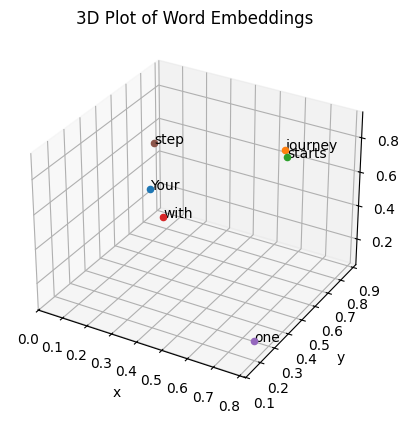

In [70]:
import matplotlib.pyplot as plt

words = ["Your", "journey", "starts", "with", "one", "step"]

x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

for x, y, z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x, y, z)
    ax.text(x, y, z, word, fontsize=10)


ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.title("3D Plot of Word Embeddings")
plt.show()

In [71]:
query = inputs[1]

attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
    attn_scores_2[i] = torch.dot(x_i, query)

print(attn_scores_2)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [72]:
print(attn_scores_2.sum())

tensor(6.5617)


In [73]:
attn_weights_2 = attn_scores_2 / attn_scores_2.sum()
print(attn_weights_2)
print(attn_weights_2.sum())

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


In [74]:
def softmax_naive(x):
    return torch.exp(x) / torch.sum(torch.exp(x))

attn_weights_naive = softmax_naive(attn_scores_2)

print(attn_weights_naive)
print(attn_weights_naive.sum())

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [75]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print(attn_weights_2)
print(attn_weights_2.sum())

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [76]:
context_vector_2 = torch.zeros(query.shape)
for token_embedding, attention_weight_2 in zip(inputs, attn_weights_2):
    print(token_embedding * attention_weight_2)
    context_vector_2 += attention_weight_2 * token_embedding

print(context_vector_2)
print(context_vector_2.sum())

tensor([0.0596, 0.0208, 0.1233])
tensor([0.1308, 0.2070, 0.1570])
tensor([0.1330, 0.1983, 0.1493])
tensor([0.0273, 0.0719, 0.0409])
tensor([0.0833, 0.0270, 0.0108])
tensor([0.0079, 0.1265, 0.0870])
tensor([0.4419, 0.6515, 0.5683])
tensor(1.6617)


In [77]:
attention_scores = torch.empty(6, 6)

for i, token_embedding_i in enumerate(inputs):
    for j, token_embedding_j in enumerate(inputs):
        attention_scores[i, j] = torch.dot(token_embedding_i, token_embedding_j)

print(attention_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [78]:
 attention_scores = inputs @ inputs.T

 print(attention_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [79]:
attention_weights = torch.softmax(attention_scores, dim=-1)
print(attention_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [80]:
print(attention_weights.sum())

tensor(6.)


In [81]:
all_context_vector = attention_weights @ inputs
print(all_context_vector)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


## IMPLEMENTING SELF ATTENTION WITH TRAINABLE WEIGHTS

In [82]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89],    # Your
        [0.55, 0.87, 0.66],    # journey
        [0.57, 0.85, 0.64],    # starts
        [0.22, 0.58, 0.33],    # with
        [0.77, 0.25, 0.10],    # one
        [0.05, 0.80, 0.55]     # step
    ]
)

In [83]:
x_2 = inputs[1]    # journey
d_out, d_in = inputs.shape

print(x_2)
print(d_in, d_out)

tensor([0.5500, 0.8700, 0.6600])
3 6


In [84]:
W_query = torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=True)
W_key = torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=True)
W_value = torch.nn.Parameter(torch.randn(d_in, d_out), requires_grad=True)

In [85]:
print(W_query)

Parameter containing:
tensor([[-1.1711, -0.8806,  1.6817,  1.2582, -2.0789, -0.6883],
        [ 0.0966, -0.3434,  0.4999,  0.1534, -0.8457, -0.2670],
        [-0.7258,  2.5990,  0.2812,  1.1676, -1.1520, -1.0612]],
       requires_grad=True)


In [86]:
print(W_key)

Parameter containing:
tensor([[ 1.7138,  1.1541,  1.7176,  0.6857,  0.5596, -0.1987],
        [ 2.6692, -0.5147,  1.1285, -0.7079,  0.4026,  1.7549],
        [-0.0819,  1.1821,  0.6267,  0.6270, -0.9559,  0.1740]],
       requires_grad=True)


In [87]:
print(W_value)

Parameter containing:
tensor([[ 0.8083, -0.9673,  0.8949,  0.2358, -0.3358, -1.1731],
        [-0.1742, -0.1236, -1.3050,  0.9371,  0.3765,  0.9510],
        [ 0.6607, -0.0612,  1.4451,  0.0926,  0.8335,  1.3432]],
       requires_grad=True)


In [88]:
query = inputs @ W_query
print(query)

tensor([[-1.1350,  1.8830,  1.0484,  1.6032, -2.0460, -1.2805],
        [-1.0391,  0.9322,  1.5455,  1.5961, -2.6395, -1.3112],
        [-1.0499,  0.8695,  1.5635,  1.5948, -2.6411, -1.2984],
        [-0.4411,  0.4648,  0.7527,  0.7511, -1.3280, -0.6565],
        [-0.9502, -0.5040,  1.4480,  1.1240, -1.9273, -0.7029],
        [-0.3805,  1.1107,  0.6387,  0.8278, -1.4141, -0.8316]],
       grad_fn=<MmBackward0>)


In [89]:
key = inputs @ W_key
print(key)

tensor([[ 1.0644,  1.4711,  1.4656,  0.7466, -0.5497,  0.3327],
        [ 3.2107,  0.9671,  2.3401,  0.1750,  0.0272,  1.5323],
        [ 3.1933,  0.9769,  2.3393,  0.1903,  0.0494,  1.4898],
        [ 1.8981,  0.3454,  1.2392, -0.0529,  0.0412,  1.0316],
        [ 1.9787,  0.8782,  1.6673,  0.4137,  0.4360,  0.3031],
        [ 2.1760,  0.2961,  1.3334, -0.1872, -0.1757,  1.4897]],
       grad_fn=<MmBackward0>)


In [90]:
value = inputs @ W_value
print(value)

tensor([[ 0.9094, -0.4889,  1.4752,  0.3243,  0.6539,  0.8337],
        [ 0.7291, -0.6799,  0.3106,  1.0061,  0.6930,  1.0687],
        [ 0.7355, -0.6955,  0.3257,  0.9902,  0.6621,  0.9993],
        [ 0.2948, -0.3047, -0.0832,  0.6260,  0.4196,  0.7367],
        [ 0.6449, -0.7818,  0.5073,  0.4251, -0.0811, -0.5312],
        [ 0.2645, -0.1809, -0.2045,  0.8124,  0.7429,  1.4409]],
       grad_fn=<MmBackward0>)


In [91]:
attention_scores = query @ key.T
print(attention_scores)

tensor([[ 4.9942, -1.1070, -1.0361, -1.6947,  0.5388, -2.3627],
        [ 4.7369, -0.6197, -0.5722, -1.2808,  0.4515, -1.7129],
        [ 4.6637, -0.6537, -0.6072, -1.2875,  0.4076, -1.7114],
        [ 2.3898, -0.1160, -0.0944, -0.5156,  0.3230, -0.7039],
        [ 2.0343, -1.0824, -1.0675, -1.0471, -0.4968, -1.2050],
        [ 3.2838,  0.1792,  0.2128, -0.5069,  0.7613, -0.7929]],
       grad_fn=<MmBackward0>)


In [92]:
attn_weights = torch.softmax(attention_scores, dim=-1)
print(attn_weights)

tensor([[9.8218e-01, 2.2002e-03, 2.3619e-03, 1.2225e-03, 1.1409e-02, 6.2678e-04],
        [9.7329e-01, 4.5907e-03, 4.8144e-03, 2.3701e-03, 1.3400e-02, 1.5386e-03],
        [9.7226e-01, 4.7693e-03, 4.9966e-03, 2.5304e-03, 1.3785e-02, 1.6561e-03],
        [7.1857e-01, 5.8643e-02, 5.9921e-02, 3.9326e-02, 9.0968e-02, 3.2575e-02],
        [7.9749e-01, 3.5332e-02, 3.5861e-02, 3.6601e-02, 6.3459e-02, 3.1255e-02],
        [8.2575e-01, 3.7031e-02, 3.8296e-02, 1.8645e-02, 6.6274e-02, 1.4007e-02]],
       grad_fn=<SoftmaxBackward0>)


In [93]:
d_k = key.shape[-1]
attn_weights = torch.softmax(attention_scores / d_k**(1/2), dim=-1)
print(attn_weights)

tensor([[0.6920, 0.0573, 0.0590, 0.0451, 0.1122, 0.0343],
        [0.6418, 0.0721, 0.0735, 0.0550, 0.1116, 0.0461],
        [0.6376, 0.0727, 0.0741, 0.0562, 0.1122, 0.0472],
        [0.3649, 0.1312, 0.1323, 0.1114, 0.1569, 0.1032],
        [0.4051, 0.1135, 0.1142, 0.1151, 0.1441, 0.1080],
        [0.4299, 0.1210, 0.1227, 0.0915, 0.1535, 0.0814]],
       grad_fn=<SoftmaxBackward0>)


In [94]:
 print(attn_weights.sum())

tensor(6., grad_fn=<SumBackward0>)


In [95]:
import torch
import numpy as np

print(torch.rand(5))
print(np.random.randn(5))

tensor([0.9033, 0.7612, 0.0768, 0.9116, 0.2228])
[ 0.32397606 -0.72943931 -1.25281606  0.8389352  -1.12256109]


In [96]:
import numpy as np

def compute_variance(dim: int, num_trials: int = 10000):
    """

    :param dim:
    :param num_trials:
    :return:
    """
    dot_products = []
    scaled_dot_products = []

    for _ in range(num_trials):
        q = np.random.random(dim)
        k = np.random.random(dim)

        dot_products.append(np.dot(q, k))
        scaled_dot_products.append(np.dot(q, k) / np.sqrt(dim))

    variance_before_scaling = np.var(dot_products)
    variance_after_scaling = np.var(scaled_dot_products)

    return variance_before_scaling, variance_after_scaling

In [97]:
compute_variance(4096)

(197.62291053916715, 0.048247780893351355)

In [98]:
import torch

torch.manual_seed(0)

In [99]:
from torch import nn

class SelfAttentionV1(nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.W_query = nn.Parameter(torch.rand(dim_in, dim_out), requires_grad=True)
        self.W_key = nn.Parameter(torch.rand(dim_in, dim_out), requires_grad=True)
        self.W_value = nn.Parameter(torch.rand(dim_in, dim_out), requires_grad=True)

    def forward(self, x):
        """

        :param x:
        :return:
        """
        keys = x @ self.W_key
        values = x @ self.W_value
        queries = x @ self.W_query

        attention_scores = queries @ keys.T
        attention_weights = torch.softmax(attention_scores / keys.shape[-1]**0.5, dim=-1)

        context_vector = attention_weights @ values

        return context_vector

In [100]:
self_attention_v1 = SelfAttentionV1(d_in, d_out)
self_attention_v1.forward(inputs)

tensor([[0.6124, 0.7181, 0.8731, 1.0437, 1.1346, 0.9173],
        [0.6390, 0.7391, 0.9026, 1.0806, 1.1809, 0.9571],
        [0.6384, 0.7384, 0.9018, 1.0796, 1.1798, 0.9563],
        [0.6114, 0.7115, 0.8695, 1.0405, 1.1322, 0.9170],
        [0.6097, 0.7063, 0.8658, 1.0368, 1.1288, 0.9151],
        [0.6196, 0.7216, 0.8803, 1.0532, 1.1469, 0.9285]],
       grad_fn=<MmBackward0>)

In [101]:
print(self_attention_v1.forward(inputs))

tensor([[0.6124, 0.7181, 0.8731, 1.0437, 1.1346, 0.9173],
        [0.6390, 0.7391, 0.9026, 1.0806, 1.1809, 0.9571],
        [0.6384, 0.7384, 0.9018, 1.0796, 1.1798, 0.9563],
        [0.6114, 0.7115, 0.8695, 1.0405, 1.1322, 0.9170],
        [0.6097, 0.7063, 0.8658, 1.0368, 1.1288, 0.9151],
        [0.6196, 0.7216, 0.8803, 1.0532, 1.1469, 0.9285]],
       grad_fn=<MmBackward0>)


In [102]:
from torch import nn

class SelfAttentionV2(nn.Module):
    def __init__(self, dim_in, dim_out, qkv: bool = False):
        super().__init__()
        self.W_query = nn.Linear(dim_in, dim_out, bias=qkv)
        self.W_key = nn.Linear(dim_in, dim_out, bias=qkv)
        self.W_value = nn.Linear(dim_in, dim_out, bias=qkv)

    def forward(self, x):
        """

        :param x:
        :return:
        """
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)

        attention_scores = queries @ keys.T
        attention_weights = torch.softmax(attention_scores / keys.shape[-1]**0.5, dim=-1)

        context_vector = attention_weights @ values

        return context_vector

In [103]:
self_attention_v2 = SelfAttentionV2(d_in, d_out)
self_attention_v2.forward(inputs)

tensor([[ 0.4849, -0.4466, -0.0491,  0.3882, -0.4893, -0.5006],
        [ 0.4812, -0.4401, -0.0464,  0.3814, -0.4858, -0.4952],
        [ 0.4812, -0.4402, -0.0464,  0.3816, -0.4858, -0.4953],
        [ 0.4799, -0.4375, -0.0444,  0.3785, -0.4844, -0.4931],
        [ 0.4812, -0.4424, -0.0442,  0.3836, -0.4844, -0.4962],
        [ 0.4798, -0.4362, -0.0452,  0.3772, -0.4850, -0.4925]],
       grad_fn=<MmBackward0>)

In [104]:
print(self_attention_v2.forward(inputs))

tensor([[ 0.4849, -0.4466, -0.0491,  0.3882, -0.4893, -0.5006],
        [ 0.4812, -0.4401, -0.0464,  0.3814, -0.4858, -0.4952],
        [ 0.4812, -0.4402, -0.0464,  0.3816, -0.4858, -0.4953],
        [ 0.4799, -0.4375, -0.0444,  0.3785, -0.4844, -0.4931],
        [ 0.4812, -0.4424, -0.0442,  0.3836, -0.4844, -0.4962],
        [ 0.4798, -0.4362, -0.0452,  0.3772, -0.4850, -0.4925]],
       grad_fn=<MmBackward0>)


## IMPLEMENTING CAUSAL ATTENTION

In [105]:
queries = self_attention_v2.W_query(inputs)
print(queries)

tensor([[ 2.1121e-01, -5.1794e-01, -1.5722e-01,  5.7688e-02,  3.4832e-01,
         -1.6667e-02],
        [-1.1838e-02, -7.9117e-01,  1.1997e-01,  3.2358e-01,  3.6490e-01,
         -2.2182e-01],
        [ 5.5161e-04, -7.8616e-01,  1.2739e-01,  3.2219e-01,  3.5551e-01,
         -1.9760e-01],
        [-7.6502e-02, -4.2899e-01,  7.9282e-02,  1.9816e-01,  2.0064e-01,
         -2.0591e-01],
        [ 2.2384e-01, -4.7453e-01,  2.2500e-01,  2.0625e-01,  8.6235e-02,
          2.9448e-01],
        [-1.9343e-01, -5.0654e-01,  1.0715e-02,  2.2220e-01,  3.0512e-01,
         -4.4459e-01]], grad_fn=<MmBackward0>)


In [106]:
keys = self_attention_v2.W_key(inputs)
print(keys)

tensor([[ 0.6165, -0.2105, -0.5102, -0.2261, -0.0527, -0.3847],
        [ 0.8726,  0.0488, -0.6401,  0.2839, -0.0879, -0.1779],
        [ 0.8575,  0.0667, -0.6211,  0.2969, -0.0819, -0.1808],
        [ 0.4932,  0.0130, -0.3754,  0.1774, -0.0640, -0.0422],
        [ 0.3445,  0.3708, -0.1032,  0.4471,  0.0494, -0.1822],
        [ 0.6704, -0.1587, -0.5822,  0.0601, -0.1247, -0.0237]],
       grad_fn=<MmBackward0>)


In [107]:
attention_scores = queries @ keys.T
print(attention_scores)

tensor([[ 0.2945,  0.2484,  0.2358,  0.1451, -0.0570,  0.2758],
        [ 0.0910, -0.0265, -0.0311, -0.0178, -0.1067,  0.0270],
        [ 0.0853, -0.0240, -0.0288, -0.0150, -0.1068,  0.0307],
        [ 0.0265, -0.0632, -0.0638, -0.0421, -0.0576, -0.0376],
        [-0.0414,  0.0267,  0.0215,  0.0384, -0.0792,  0.0891],
        [ 0.0866, -0.0850, -0.0849, -0.0674, -0.0601, -0.0697]],
       grad_fn=<MmBackward0>)


In [108]:
attn_weights = torch.softmax(attention_scores / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[0.1737, 0.1705, 0.1696, 0.1634, 0.1505, 0.1724],
        [0.1737, 0.1655, 0.1652, 0.1661, 0.1602, 0.1692],
        [0.1732, 0.1657, 0.1653, 0.1663, 0.1601, 0.1694],
        [0.1712, 0.1651, 0.1650, 0.1665, 0.1654, 0.1668],
        [0.1632, 0.1678, 0.1675, 0.1686, 0.1607, 0.1721],
        [0.1759, 0.1640, 0.1640, 0.1652, 0.1657, 0.1651]],
       grad_fn=<SoftmaxBackward0>)


In [109]:
rows, columns = attn_weights.shape
mask_simple = torch.tril(torch.ones(rows, columns))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [110]:
mask_simple = attn_weights * mask_simple
print(mask_simple)

tensor([[0.1737, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1737, 0.1655, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1732, 0.1657, 0.1653, 0.0000, 0.0000, 0.0000],
        [0.1712, 0.1651, 0.1650, 0.1665, 0.0000, 0.0000],
        [0.1632, 0.1678, 0.1675, 0.1686, 0.1607, 0.0000],
        [0.1759, 0.1640, 0.1640, 0.1652, 0.1657, 0.1651]],
       grad_fn=<MulBackward0>)


In [111]:
row_sums = mask_simple.sum(dim=1, keepdim=True)
mask_simple_norm = mask_simple / row_sums
print(mask_simple_norm)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5120, 0.4880, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3435, 0.3285, 0.3279, 0.0000, 0.0000, 0.0000],
        [0.2564, 0.2472, 0.2471, 0.2493, 0.0000, 0.0000],
        [0.1972, 0.2027, 0.2023, 0.2037, 0.1941, 0.0000],
        [0.1759, 0.1640, 0.1640, 0.1652, 0.1657, 0.1651]],
       grad_fn=<DivBackward0>)


In [112]:
print(attention_scores)

tensor([[ 0.2945,  0.2484,  0.2358,  0.1451, -0.0570,  0.2758],
        [ 0.0910, -0.0265, -0.0311, -0.0178, -0.1067,  0.0270],
        [ 0.0853, -0.0240, -0.0288, -0.0150, -0.1068,  0.0307],
        [ 0.0265, -0.0632, -0.0638, -0.0421, -0.0576, -0.0376],
        [-0.0414,  0.0267,  0.0215,  0.0384, -0.0792,  0.0891],
        [ 0.0866, -0.0850, -0.0849, -0.0674, -0.0601, -0.0697]],
       grad_fn=<MmBackward0>)


In [113]:
mask = torch.triu(torch.ones(rows, columns), diagonal=1)
masked = attention_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[ 0.2945,    -inf,    -inf,    -inf,    -inf,    -inf],
        [ 0.0910, -0.0265,    -inf,    -inf,    -inf,    -inf],
        [ 0.0853, -0.0240, -0.0288,    -inf,    -inf,    -inf],
        [ 0.0265, -0.0632, -0.0638, -0.0421,    -inf,    -inf],
        [-0.0414,  0.0267,  0.0215,  0.0384, -0.0792,    -inf],
        [ 0.0866, -0.0850, -0.0849, -0.0674, -0.0601, -0.0697]],
       grad_fn=<MaskedFillBackward0>)


In [114]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5120, 0.4880, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3435, 0.3285, 0.3279, 0.0000, 0.0000, 0.0000],
        [0.2564, 0.2472, 0.2471, 0.2493, 0.0000, 0.0000],
        [0.1972, 0.2027, 0.2023, 0.2037, 0.1941, 0.0000],
        [0.1759, 0.1640, 0.1640, 0.1652, 0.1657, 0.1651]],
       grad_fn=<SoftmaxBackward0>)


In [115]:
dropout = torch.nn.Dropout()

In [116]:
print(dropout)

Dropout(p=0.5, inplace=False)


In [117]:
print(dropout(attn_weights))

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.9760, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.6871, 0.0000, 0.6558, 0.0000, 0.0000, 0.0000],
        [0.5128, 0.0000, 0.4942, 0.4986, 0.0000, 0.0000],
        [0.3943, 0.4054, 0.4046, 0.4074, 0.3883, 0.0000],
        [0.3519, 0.0000, 0.0000, 0.3304, 0.0000, 0.3301]],
       grad_fn=<MulBackward0>)


In [118]:
from torch import nn

class CausalAttention(nn.Module):
    def __init__(self, dim_in: int, dim_out: int, context_length: int, dropout: float, qkv_bias: bool = False):
        super().__init__()
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.W_query = nn.Linear(dim_in, dim_out, bias=qkv_bias)
        self.W_key = nn.Linear(dim_in, dim_out, bias=qkv_bias)
        self.W_value = nn.Linear(dim_in, dim_out, bias=qkv_bias)
        self.dropout = nn.Dropout(dropout)
        self.register_buffer("mask", torch.triu(torch.ones(context_length, context_length), diagonal=1))

    def forward(self, x):
        """

        :param x:
        :return:
        """
        b, num_tokens, dim_in = x.shape
        keys = self.W_key(x)
        values = self.W_value(x)
        queries = self.W_query(x)

        attention_scores = queries @ keys.transpose(1, 2)
        attention_scores.masked_fill(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
        attention_weights = torch.softmax(attention_scores / keys.shape[-1]**0.5, dim=-1)
        attention_weights = self.dropout(attention_weights)

        context_vector = attention_weights @ values

        return context_vector

In [119]:
batch = torch.stack((inputs, inputs))
print(batch)

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])


In [120]:
print(d_in, d_out)

3 6


In [121]:
context_length = batch.shape[1]
print(context_length)

6


In [122]:
causal_attention = CausalAttention(d_in, d_out, context_length, 0.0)
context_vector = causal_attention(batch)
print(context_vector)

tensor([[[-0.1289,  0.0687, -0.1610, -0.1956, -0.1315,  0.5237],
         [-0.1331,  0.0630, -0.1575, -0.1914, -0.1327,  0.5249],
         [-0.1330,  0.0632, -0.1576, -0.1915, -0.1327,  0.5249],
         [-0.1297,  0.0684, -0.1607, -0.1964, -0.1316,  0.5232],
         [-0.1296,  0.0691, -0.1610, -0.1978, -0.1315,  0.5227],
         [-0.1306,  0.0666, -0.1597, -0.1944, -0.1320,  0.5240]],

        [[-0.1289,  0.0687, -0.1610, -0.1956, -0.1315,  0.5237],
         [-0.1331,  0.0630, -0.1575, -0.1914, -0.1327,  0.5249],
         [-0.1330,  0.0632, -0.1576, -0.1915, -0.1327,  0.5249],
         [-0.1297,  0.0684, -0.1607, -0.1964, -0.1316,  0.5232],
         [-0.1296,  0.0691, -0.1610, -0.1978, -0.1315,  0.5227],
         [-0.1306,  0.0666, -0.1597, -0.1944, -0.1320,  0.5240]]],
       grad_fn=<UnsafeViewBackward0>)


In [123]:
print(context_vector.shape)

torch.Size([2, 6, 6])


In [124]:
class MultiHeadAttention(nn.Module):
    def __init__(self, dim_in: int, dim_out: int, context_length: int, dropout, num_heads, qkv_bias: bool = False):
        super().__init__()
        self.heads = nn.ModuleList(
            [
                CausalAttention(dim_in, dim_out, context_length, dropout, qkv_bias) for _ in range(num_heads)
            ]
        )

    def forward(self, x):
        return torch.cat([head(x) for head in self.heads], dim=-1)

In [125]:
context_length = batch.shape[1]
print(context_length)

6


In [126]:
print(d_in, d_out)

3 6


In [127]:
batch = torch.stack((inputs, inputs))
print(batch)

tensor([[[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]],

        [[0.4300, 0.1500, 0.8900],
         [0.5500, 0.8700, 0.6600],
         [0.5700, 0.8500, 0.6400],
         [0.2200, 0.5800, 0.3300],
         [0.7700, 0.2500, 0.1000],
         [0.0500, 0.8000, 0.5500]]])


In [128]:
multi_head = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=4)
context_vector = multi_head(batch)
print(context_vector)

tensor([[[-0.5581, -0.3986, -0.0288, -0.1185,  0.1098,  0.1858,  0.6544,
           0.0428, -0.1910,  0.0417,  0.7906,  0.0063,  0.7235,  0.3700,
           0.5898,  0.1846, -0.2321, -0.1912,  0.0300, -0.2492, -0.4793,
          -0.1056, -0.0768, -0.1879],
         [-0.5598, -0.4026, -0.0336, -0.1205,  0.1149,  0.1828,  0.6521,
           0.0424, -0.1911,  0.0437,  0.7876,  0.0083,  0.7132,  0.3597,
           0.5789,  0.1860, -0.2260, -0.1907,  0.0314, -0.2510, -0.4727,
          -0.1064, -0.0835, -0.1874],
         [-0.5598, -0.4024, -0.0334, -0.1204,  0.1147,  0.1829,  0.6521,
           0.0423, -0.1910,  0.0436,  0.7876,  0.0082,  0.7132,  0.3599,
           0.5790,  0.1859, -0.2261, -0.1906,  0.0311, -0.2510, -0.4732,
          -0.1060, -0.0832, -0.1877],
         [-0.5627, -0.4060, -0.0355, -0.1226,  0.1171,  0.1825,  0.6534,
           0.0423, -0.1916,  0.0447,  0.7892,  0.0090,  0.7096,  0.3556,
           0.5761,  0.1851, -0.2235, -0.1929,  0.0322, -0.2497, -0.4715,
          

In [131]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert (d_out % num_heads == 0), \
            "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = d_out // num_heads # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask",
            torch.triu(torch.ones(context_length, context_length),
                       diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x) # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec) # optional projection

        return context_vec

In [132]:
torch.manual_seed(123)

# Define the tensor with 3 rows and 6 columns
inputs = torch.tensor(
    [[0.43, 0.15, 0.89, 0.55, 0.87, 0.66],  # Row 1
     [0.57, 0.85, 0.64, 0.22, 0.58, 0.33],  # Row 2
     [0.77, 0.25, 0.10, 0.05, 0.80, 0.55]]  # Row 3
)

batch = torch.stack((inputs, inputs))
print(batch.shape)

batch_size, context_length, d_in = batch.shape
d_out = 6
mha = MultiHeadAttention(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

torch.Size([2, 3, 6])
tensor([[[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]],

        [[ 0.1569, -0.0873,  0.0210,  0.0215, -0.3243, -0.2518],
         [ 0.1117, -0.0547,  0.0406, -0.0213, -0.3251, -0.2993],
         [ 0.1196, -0.0491,  0.0318, -0.0635, -0.2788, -0.2578]]],
       grad_fn=<ViewBackward0>)
context_vecs.shape: torch.Size([2, 3, 6])
